# First pass analysis of line/loop data




## Try to predict whether a probe trial will be correct or not



The question we have to ask is what are they struggling to do right now? In the best case scenario, it is random, we would want these regressors 


### The full way of doing it

This is a Bernoulli regression problem (I think this is an easier way to think about it than a binomial). Build a model with the following regressors. (Do you want an animal performance regressor?)

<ol>
    <li> Source x target (too much??) </li>
    <li> Source to target distance </li>
    <li> Whether this transition exists in both graphs </li>
    <li> The task number that this is on </li>
    <li> Whether this is a line or a loop </li>
    <li> Marginal animal performance on day (?) </li>
    <li> Transition from that node on other graph </li>
    <li> Training day </li>
    <li> Session number </li>
    <li> Number of rewards already received (this could be interesting, could go both ways) </li>
    <li> Is to a reward or not? </li>
</ol>

<b> I think we want to fit this model to each day and see basically all regressors shrinking. </b>


### What is the simple thing to look at?

Ideally would want to look at whether there are some transitions that they are great at and some that they are shit at. The problem is that there is not enough data. Thats why the above approach is nice.


## Analyse the errors

Yes the key question now is what happens on probe trials

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
import datetime
from statsmodels.stats import proportion
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")

In [2]:
import mouse_poker as mpk

ModuleNotFoundError: No module named 'mouse_poker'

# Defined functions 

In [ ]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [ ]:
def get_empty_transition_dict(n_nodes=9):
    tmp1 = [str(i[1])+str(i[-2]) for i in list(itertools.combinations(range(n_nodes),2))]
    tmp1.extend([i[::-1] for i in tmp1])
    res_dct = {}
    for i in tmp1:
        res_dct[i] = []
    return res_dct

# Actual code to run stuff 

In [227]:
ROOT = "/Users/Yves/Documents/behavior_data/line_loop_cohort_3/"
#ROOT = '/Users/Yves/Documents/behavior_data/line_loop_cohort_2/'
all_df  = mpk.load.create_base_df(ROOT,rerun=True)
all_df = mpk.load.load_df(ROOT)

In [215]:
good_df = all_df.loc[all_df['nRews']>20]

In [172]:
day_df = good_df.loc[good_df['date']==date]


In [226]:
date = datetime.date(2020,9,30)

np.sum(pd.Series([i.date() for i in good_df['date']])==date)

33

In [225]:
good_df

,mouse_ID,group,date,time,task_name,structure,layout,valid,nRews,task_nr,test,filepath,summary_dict
0,460175_None,line_loop_batch_4,2020-09-30,10:19:20,transition_task_yw_growing,loop,G3_1,True,204,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 4, 'reward_abs..."
1,460175_None,line_loop_batch_4,2020-10-01,14:46:26,transition_task_yw_growing,loop,G3_1,True,133,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 4, 'reward_abs..."
2,460175_None,line_loop_batch_4,2020-09-28,13:55:41,transition_task_yw_growing,loop,G3_1,True,236,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 4, 'reward_abs..."
3,459849_3,line_loop_batch_4,2020-10-07,09:42:41,transition_task_yw_growing,line,G1_1,True,367,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 2, 'reward_abs..."
4,459849_None,line_loop_batch_4,2020-09-21,15:53:45,transition_task_yw_growing,loop,G1_1,True,56,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 4, 'reward_abs..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,456674_10,line_loop_batch_3,2020-10-05,15:48:29,transition_task_yw_growing_v2,line,G2_0,True,214,1,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 1, 'reward_volume': 4, 'reward_abs..."
1243,456674_1,line_loop_batch_3,2020-09-23,15:54:58,transition_task_yw_forced_PC,loop,G2_1,True,37,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 10, 'reward_ab..."
1244,456674_1,line_loop_batch_3,2020-10-07,10:35:52,transition_task_yw_growing_v2,loop,G2_1,True,84,2,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 2, 'reward_volume': 10, 'reward_ab..."
1245,460175_1,line_loop_batch_3,2020-10-09,14:42:46,transition_task_yw_growing_v2,line,G3_0,True,182,1,False,/Users/Yves/Documents/behavior_data/line_loop_...,"{'task_nr': 1, 'reward_volume': 2, 'reward_abs..."


In [216]:
datetimeTimestamp('2020-09-30 00:00:00')


NameError: name 'datetimeTimestamp' is not defined

In [217]:
#res_dct = {}
#for i in tmp1:
#    res_dct[i] = []

In [218]:
np.sum(good_df['date']==date)

0

In [219]:
THRESHT = 90.

date = datetime.date(2020,10,15)
#day_df = good_df.loc[good_df['date']==date]

tdict = get_empty_transition_dict()



day_df = good_df.loc[good_df['date']==date]
if True:#'forced' in day_df['task_name'].values[0]:


    bin_ms = 1
    bin_mult = 1000/bin_ms
    window_s  = 2.


    poked_in_probe = []
    poked_correct = []
    poked_correctR = []
    poked_correctNR = []

    res = {'pkA':[],
           'pkR':[],
           'pkNR':[],
           'pkA2':[],
           'pkR2':[],
           'pkNR2':[],
           'pkFrac': [],
           'pkFR': [],
           'graph_type':[],
           'graph_id':[],
           'task_nr': []}


    for fpath in day_df['filepath'].values:
        print(fpath)
        f = open(fpath,'r')
        lines = f.readlines()
        dat_dict,events,event_times,nRews = mpk.load.parse_data(lines,None)
        out = mpk.load.get_metadata(lines)
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,summary_dict = out
        res['graph_type'].append(lineloop)
        res['graph_id'].append(graph)
        res['task_nr'].append(task_nr)



        nMs = int(np.max(event_times)*1000/bin_ms) #data binned into 10ms chunks

        inPokes = np.array([int(i[-1])-1 for kk,i in enumerate(events) if re.findall('poke_[0-9]$',i)])
        inPoke_t = np.floor(event_times[np.array([kk for kk,i in enumerate(events) if re.findall('poke_[0-9]$',i)])]*bin_mult).astype('int')    
        outPoke_t = np.floor(event_times[np.array([kk for kk,i in enumerate(events) if re.findall('poke_[0-9]_out',i)])]*bin_mult).astype('int')    
        if len(outPoke_t)>len(inPoke_t): outPoke_t = outPoke_t[1:] #if the first recorded thing is an outpoke
        if len(inPoke_t)>len(outPoke_t): inPoke_t = inPoke_t[:-1]; inPokes = inPokes[:-1]
        poke_dur = outPoke_t - inPoke_t

        inPoke_t = inPoke_t[poke_dur>THRESHT]
        inPokes = inPokes[poke_dur>THRESHT]
        isProbe = np.array([i[-1] for i in dat_dict['port']])

        poked_in_probe = []
        poked_correct = []
        poked_correctR = []
        poked_correctNR = []

        probe_ixs = np.where(isProbe)[0]
        #for ix in probe_ixs[int(np.floor(len(probe_ixs)/2.)):]:
        for ix in probe_ixs:

            t_str = str(dat_dict['port'][ix][0]) + str(dat_dict['port'][ix][1])
            probeT = int(dat_dict['port'][ix][-2]*bin_mult)
            
            prevPk = dat_dict['port'][ix][0]
            target = dat_dict['port'][ix][1]

            #these are pokes in window before light comes on
            ixs = (np.where((inPoke_t>probeT) *
                           (inPoke_t<(probeT+(window_s*bin_mult))))[0])# *
                          # inPokes!=prevPk)[0])# %(len(inPokes)-1)

            
            if len(ixs)>0:
                
                use2 = [i for i in inPokes[ixs] if i!=prevPk]
                #use2 = inPokes[ixs]
                if len(use2)>0:
                    if target==use2[0]:
                    #if target in inPokes[ixs]:
                        if target in [0,3,5,8]:
                            poked_correctR.append(1)
                            tdict[t_str].append(1)

                        else:
                            poked_correctNR.append(1)
                            tdict[t_str].append(1)
                        poked_correct.append(1)
                    else:
                        if target in [0,3,5,8]:
                            poked_correctR.append(0)
                            tdict[t_str].append(0)
                        else:
                            poked_correctNR.append(0)
                            tdict[t_str].append(0)
                        poked_correct.append(0)

                        poked_in_probe.append(1)
                else:
                    poked_in_probe.append(0)
                    tdict[t_str].append(0)
            else:
                #poked_in_probe.append(0)
                #poked_correct.append(0)
                #if target in [0,3,5,8]:
                #    poked_correctR.append(0)
                #else:
                #    poked_correctNR.append(0)
    
                #tdict[t_str].append(0)
                pass

        res['pkA'].append(poked_correct)
        res['pkR'].append(poked_correctR)
        res['pkNR'].append(poked_correctNR)
        res['pkFrac'].append(poked_in_probe)

        res['pkA2'].append([i for j in res['pkA'] for i in j])
        res['pkR2'].append([i for j in res['pkR'] for i in j])
        res['pkNR2'].append([i for j in res['pkNR'] for i in j])
        res['pkFR'].append([i for j in res['pkFrac'] for i in j])


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.


/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_3'-2020-10-15-092240.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_10'-2020-10-15-142142.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_1'-2020-10-15-142142.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456675_10'-2020-10-15-092240.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_1'-2020-10-15-092240.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_1'-2020-10-15-142142.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'459850_None'-2020-10-15-142142.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'456674_30'-2020-10-15-092240.txt
/Users/Yves/Documents/behavior_data/line_loop_cohort_3/line_loop_batch_3/'460175_10'-2020-10-15-092240.txt
/Users/Yves/Documents/behavior_data/lin

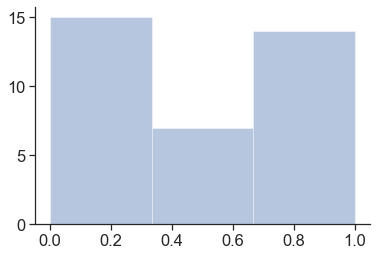

In [144]:
mu_transs = []
for k,v in tdict.items():
    if len(v)>0:
        mu_transs.append(np.mean(v))

seaborn.distplot(mu_transs,kde=0)
seaborn.despine()

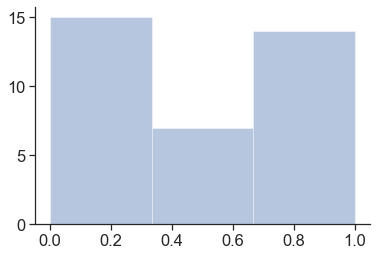

In [145]:
mu_transs = []
for k,v in tdict.items():
    if len(v)>0:
        mu_transs.append(np.mean(v))

seaborn.distplot(mu_transs,kde=0)
seaborn.despine()

In [146]:
pkNR = [i for j in res['pkNR'] for i in j]
pkA = [i for j in res['pkA'] for i in j]
pkR = [i for j in res['pkR'] for i in j]
pkFR = [i for j in res['pkFR'] for i in j]

In [147]:
'probe fraction correct all:{}, to-rew:{}, to-nonRew:{}'.format(np.mean(pkA),np.mean(pkR),np.mean(pkNR))

'probe fraction correct all:0.4934895833333333, to-rew:0.6296296296296297, to-nonRew:0.37889688249400477'

In [148]:
'probe fraction correct all:{}, to-rew:{}, to-nonRew:{}'.format(np.mean(pkA),np.mean(pkR),np.mean(pkNR))

'probe fraction correct all:0.4934895833333333, to-rew:0.6296296296296297, to-nonRew:0.37889688249400477'

In [149]:
stt.binom_test(np.sum(pkNR),n=len(pkNR),p=1/9.)

7.059407411719974e-46

In [150]:
stt.binom_test(np.sum(pkR),n=len(pkR),p=1/9.)

4.1599124033719915e-119

In [151]:
mu =np.array([np.mean(pkA),np.mean(pkR),np.mean(pkNR)])


ci = np.array([proportion.proportion_confint(np.sum(pkA),len(pkA)),
               proportion.proportion_confint(np.sum(pkR),len(pkR)),
               proportion.proportion_confint(np.sum(pkNR),len(pkNR))])

ci = np.abs(ci- mu[:,None]).T

In [152]:
ciFR = np.abs(proportion.proportion_confint(np.sum(pkFR),len(pkFR))-np.mean(pkFR))

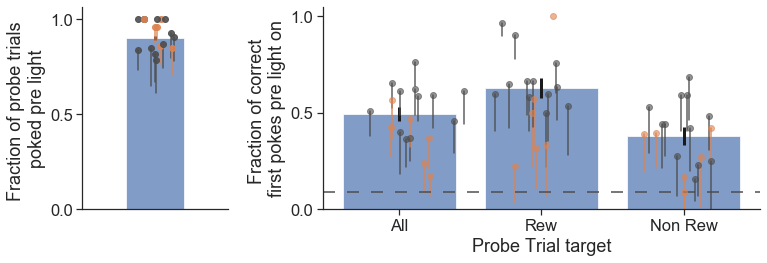

In [153]:
#.figure(figsize=(11,4))
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,3]},figsize=(11,4))

a0.bar([0],np.mean(pkFR),yerr=ciFR.reshape(-1,1),error_kw={'elinewidth':3},alpha=.7)

clrs = [seaborn.color_palette()[1],'.3']
for ctr,i in enumerate(res['pkFrac']):
    clr_ = clrs[0] if res['graph_type'][ctr]=='loop' else clrs[1]

    xi = np.random.normal(loc=0,scale=.15)
    a0.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.9)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a0.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

a0.set_xlim(-1,1)
a0.set_xticks([])
a0.locator_params('y',nbins=3)
a0.set_ylabel("Fraction of probe trials \npoked pre light")
#a1.subplot(1,2,2)
#np.random.seed(99)
a1.bar([0,1,2],mu,yerr=ci,error_kw={'elinewidth':3},alpha=.7)
for ctr,i in enumerate(res['pkA']):
    clr_ = clrs[0] if res['graph_type'][ctr]=='loop' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=0,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)
    
for ctr,i in enumerate(res['pkR']):
    clr_ = clrs[0] if res['graph_type'][ctr]=='loop' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=1,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

for ctr,i in enumerate(res['pkNR']):
    clr_ = clrs[0] if res['graph_type'][ctr]=='loop' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=2,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

a1.axhline(y=0.09,dashes=(8,8),color='.3')
a1.set_ylabel("Fraction of correct \nfirst pokes pre light on")
a1.set_xlabel("Probe Trial target")
a1.set_ylim(0,1.05)
a1.locator_params('y',nbins=3)
plt.xticks([0,1,2],['All','Rew','Non Rew'])

seaborn.despine()

plt.tight_layout()

In [94]:
mu1 = [np.mean(i) for i in res['pkFrac']]
mu2 = [np.mean(i) for i in res['pkA']]

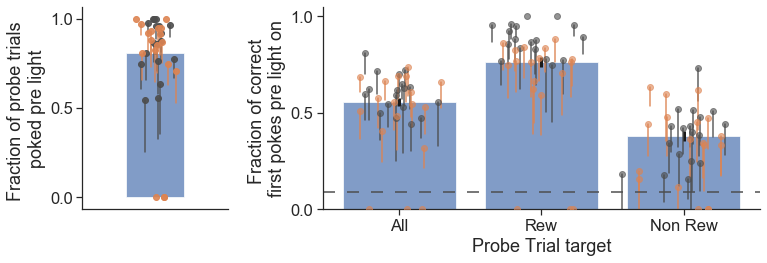

In [95]:
#.figure(figsize=(11,4))
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,3]},figsize=(11,4))

a0.bar([0],np.mean(pkFR),yerr=ciFR.reshape(-1,1),error_kw={'elinewidth':3},alpha=.7)

clrs = [seaborn.color_palette()[1],'.3']
for ctr,i in enumerate(res['pkFrac']):
    clr_ = clrs[0] if res['task_nr'][ctr]=='1' else clrs[1]

    xi = np.random.normal(loc=0,scale=.15)
    a0.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.9)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a0.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

a0.set_xlim(-1,1)
a0.set_xticks([])
a0.locator_params('y',nbins=3)
a0.set_ylabel("Fraction of probe trials \npoked pre light")
#a1.subplot(1,2,2)
#np.random.seed(99)
a1.bar([0,1,2],mu,yerr=ci,error_kw={'elinewidth':3},alpha=.7)
for ctr,i in enumerate(res['pkA']):
    clr_ = clrs[0] if res['task_nr'][ctr]=='1' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=0,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)
    
for ctr,i in enumerate(res['pkR']):
    clr_ = clrs[0] if res['task_nr'][ctr]=='1' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=1,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

for ctr,i in enumerate(res['pkNR']):
    clr_ = clrs[0] if res['task_nr'][ctr]=='1' else clrs[1]
    #print(clr_)
    xi = np.random.normal(loc=2,scale=.15)
    a1.scatter(xi,np.mean(i),zorder=100,color=clr_,alpha=.6)
    ci_ = proportion.proportion_confint(np.sum(i),len(i))
    a1.plot([xi,xi],[ci_[0],np.mean(i)],color=clr_,alpha=0.9)

a1.axhline(y=0.09,dashes=(8,8),color='.3')
a1.set_ylabel("Fraction of correct \nfirst pokes pre light on")
a1.set_xlabel("Probe Trial target")
a1.set_ylim(0,1.05)
a1.locator_params('y',nbins=3)
plt.xticks([0,1,2],['All','Rew','Non Rew'])

seaborn.despine()

plt.tight_layout()

In [62]:
import numpy as np

In [63]:
a = np.zeros([5,5])
np.fill_diagonal(a[1:],1)

In [64]:
a.dot(np)

TypeError: unsupported operand type(s) for *: 'float' and 'module'

In [65]:
x = np.zeros([5])
x[1] = 1

In [66]:
x

array([0., 1., 0., 0., 0.])

In [10]:
np.dot(a,x)

array([0., 0., 1., 0., 0.])